<a href="https://colab.research.google.com/github/giulicrenna/data_science/blob/main/Python_for_data_science_notebook_linkedin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# Download Spark
# https://spark.apache.org/downloads.html
!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
# Unzip the file
!tar xf spark-3.3.2-bin-hadoop3.tgz
!python -m pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.3.2-bin-hadoop3'

In [29]:
import pandas as pd
import findspark
findspark.init()
findspark.find()

import pyspark
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from google.colab import drive
import seaborn as sns
import numpy as np

drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
so = pd.read_csv('/content/drive/MyDrive/Instituto Crenna/csv/SO.csv')
so.head(5).style.background_gradient()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-28,44.619999,45.430000,44.619999,45.360001,35.349178,5568900
1,2014-07-29,45.470001,45.470001,44.669998,44.860001,34.959522,5499600
2,2014-07-30,45.000000,45.000000,44.009998,44.380001,34.585461,6945200
3,2014-07-31,43.889999,43.889999,43.220001,43.290001,34.139881,5675300
4,2014-08-01,43.340000,43.830002,43.250000,43.320000,34.163548,4193700


In [5]:
'''
Encontrar correlaciones entre las
'''
correlatio_so = so.corr()
correlatio_so.style.background_gradient()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.996592,0.996288,0.991826,0.808282,-0.175173
High,0.996592,1.000000,0.996331,0.996448,0.812829,-0.151233
Low,0.996288,0.996331,1.000000,0.996722,0.809979,-0.197334
Close,0.991826,0.996448,0.996722,1.000000,0.813579,-0.173276
Adj Close,0.808282,0.812829,0.809979,0.813579,1.000000,-0.121980
Volume,-0.175173,-0.151233,-0.197334,-0.173276,-0.121980,1.000000


In [6]:
'''
Análisis de extremos
(Para deteccion de outliers)
'''
high = so.High
Q1 = np.percentile(high, 25)
Q3 = np.percentile(high, 75)
RI = Q3 - Q1 # (rango interquartil)
print(Q1.__str__() + '\n' + Q3.__str__() + '\n' + RI.__str__())

45.09
50.66
5.569999999999993


In [7]:
high

0       45.430000
1       45.470001
2       45.000000
3       43.889999
4       43.830002
          ...    
1254    55.610001
1255    55.619999
1256    55.669998
1257    55.810001
1258    55.830002
Name: High, Length: 1259, dtype: float64

In [8]:
umbral_superior = Q3 + .5*RI
umbral_inferior = Q1 - .5*RI
print(umbral_superior.__str__() + '\n' + umbral_inferior.__str__())

53.44499999999999
42.30500000000001


Distribucion no simétrica

In [9]:
np.mean(high > umbral_superior)

0.06354249404289118

In [10]:
np.mean(high < umbral_inferior)

0.004765687053216839

In [19]:
'''
Detección de outliers con sklearn
'''
from sklearn.covariance import EllipticEnvelope

In [12]:
outliers = EllipticEnvelope(contamination=0.01)

In [13]:
'''
Presuponemos que hay una distribución gaussiana de los datos
'''
var_list = so.columns.values.tolist()
var_list.remove('Date')
var_list

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [21]:
so_arr = np.array(so[var_list].values)
outliers.fit(so_arr)
so_arr

array([[4.4619999e+01, 4.5430000e+01, 4.4619999e+01, 4.5360001e+01,
        3.5349178e+01, 5.5689000e+06],
       [4.5470001e+01, 4.5470001e+01, 4.4669998e+01, 4.4860001e+01,
        3.4959522e+01, 5.4996000e+06],
       [4.5000000e+01, 4.5000000e+01, 4.4009998e+01, 4.4380001e+01,
        3.4585461e+01, 6.9452000e+06],
       ...,
       [5.5459999e+01, 5.5669998e+01, 5.5099998e+01, 5.5639999e+01,
        5.5639999e+01, 3.6139000e+06],
       [5.5540001e+01, 5.5810001e+01, 5.5250000e+01, 5.5360001e+01,
        5.5360001e+01, 3.2809000e+06],
       [5.5340000e+01, 5.5830002e+01, 5.5200001e+01, 5.5740002e+01,
        5.5740002e+01, 2.2887000e+06]])

In [15]:
pred = outliers.predict(so_arr)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
'''
Detectamos las posiciones de los outliers en forma multi-variable
'''
pos_outliers = np.where(pred == -1)
pos_outliers = pos_outliers[0].tolist()
pos_outliers

[129, 132, 134, 271, 272, 383, 448, 519, 540, 579, 1099, 1106, 1111]

In [17]:
clean_so = so.drop(pos_outliers, axis=0)

In [18]:
clean_so

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-28,44.619999,45.430000,44.619999,45.360001,35.349178,5568900
1,2014-07-29,45.470001,45.470001,44.669998,44.860001,34.959522,5499600
2,2014-07-30,45.000000,45.000000,44.009998,44.380001,34.585461,6945200
3,2014-07-31,43.889999,43.889999,43.220001,43.290001,34.139881,5675300
4,2014-08-01,43.340000,43.830002,43.250000,43.320000,34.163548,4193700
...,...,...,...,...,...,...,...
1254,2019-07-22,55.400002,55.610001,54.869999,55.480000,55.480000,4623300
1255,2019-07-23,55.500000,55.619999,55.009998,55.419998,55.419998,3023300
1256,2019-07-24,55.459999,55.669998,55.099998,55.639999,55.639999,3613900
1257,2019-07-25,55.540001,55.810001,55.250000,55.360001,55.360001,3280900


<AxesSubplot:>

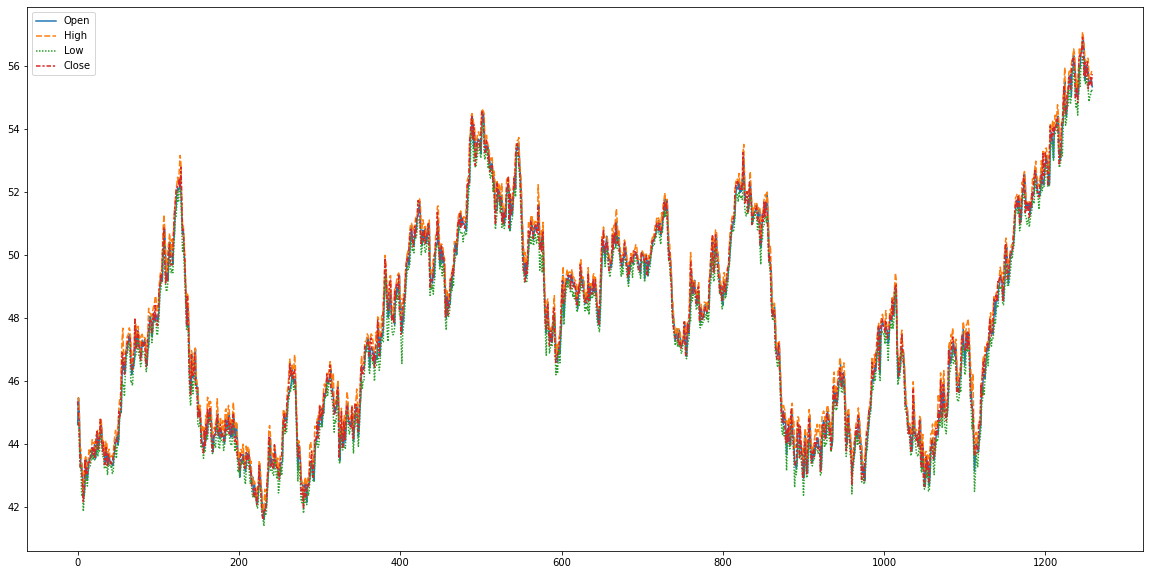

In [32]:
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=clean_so.drop(['Volume', 'Adj Close'], axis=1))



---



In [50]:
'''
Ejemplo de division de tablas por clave primaria y base de datos de registros
'''
labels0 = ["id_cliente", "nombre", "edad", "id_producto", "detalle", "cantidad"]
data0 = [(100, "Juan", 45, 2, "lavarropas", 1),
         (200, "Alberto", 24, 3, "computadoras", 2),
         (200, "Alberto", 24, 7, "Celular", 1),
         (300, "Maria", 56, 7, "Celular", 4),
         (300, "Maria", 56, 2, "lavarropas", 1)]

df = pd.DataFrame.from_records(data0, columns=labels0)

In [51]:
df

,id_cliente,nombre,edad,id_producto,detalle,cantidad
0,100,Juan,45,2,lavarropas,1
1,200,Alberto,24,3,computadoras,2
2,200,Alberto,24,7,Celular,1
3,300,Maria,56,7,Celular,4
4,300,Maria,56,2,lavarropas,1


In [52]:
clientes = df.drop_duplicates(subset='id_cliente')[['id_cliente', 'nombre', 'edad']]
clientes

,id_cliente,nombre,edad
0,100,Juan,45
1,200,Alberto,24
3,300,Maria,56


In [53]:
productos = df.drop_duplicates(subset='id_producto')[['id_producto', 'detalle', 'cantidad']]
productos

,id_producto,detalle,cantidad
0,2,lavarropas,1
1,3,computadoras,2
2,7,Celular,1


In [54]:
compras = df[['id_producto', 'id_cliente', 'cantidad']]
compras

,id_producto,id_cliente,cantidad
0,2,100,1
1,3,200,2
2,7,200,1
3,7,300,4
4,2,300,1
